In [1]:
import numpy as np
import matplotlib.pyplot as plt



# Number of mus as population number
mu_count = 10
# theta initialization
theta = 0
# variances that will be tested in each iteration
var_range = np.arange(0, 1, 0.005)
# indicates how many times each population should generate new numbers
confidence = 300
# boundary of our distribution
bins = np.arange(-100,100)

diversity = []
MSE = []

In [130]:
# generates a normal distribution histogram
def generate_ideal_normal(sigma):
    return np.array(1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - theta)**2 / (2 * sigma**2)))

In [8]:
MSE = []
ru = 2
for var in var_range:
    SE = []
    for _ in range(confidence):
        # generate initial population by choosing random numbers with normal distribution 
        # (mean = theta, sigma = each variance in var_range)
        mus = np.random.normal(0, np.sqrt(var), mu_count)
        
        # each individual get a scalar value from a normal distribution 
        # (mean = theta, sigma = e^-|theta - mu for each mu of individual|)
        mus_signals = np.array([np.random.normal(theta, 
                                                 np.sqrt(np.abs(theta - m) + 1)) for m in mus])#generate_ideal_normal(np.exp(-1 * np.abs(theta - m))) for m in mus])    
        
        # each squared error is the difference between the average of all individual signals and theta
        SE.append((np.mean(mus_signals) - theta)**2)
#     print(SE)
        
    # generate new theta
#     ru += 0.05
    theta = np.random.normal(0, ru)
    ru += 1
#     plt.plot(mus)
#     plt.show()
    
    MSE.append(np.mean(SE))

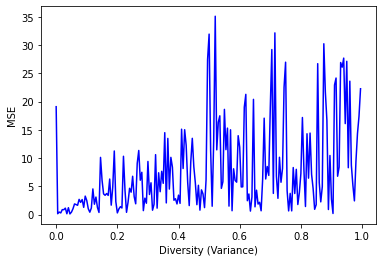

In [9]:
plt.xlabel('Diversity (Variance)')
plt.ylabel('MSE')
plt.plot(var_range, MSE, 'b-')

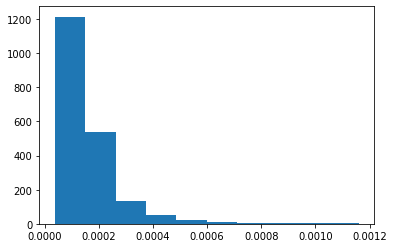

In [9]:
plt.hist(MSE)
plt.show()